In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# reading the output.txt

n_lines = 20
with open('output.txt', 'r') as f:
    cnt = 0
    output = ""
    while cnt < n_lines:
        output += f.readline()
        cnt+=1
        
print(output)

.00
27219; 13.00
27234; 13.0.00
27117; 13.00
27132; 13.00
27147; 13.00
27161; 13.00
27175; 13.00
27190; 13.00
27205; 13.00
27219; 13.00
27234; 13.00; 13.00
0; 13.00
1; 13.00
1; 13.00
2; 13.00
2; 13.00
3; 13.00
5; 13.00
15; 13.00



In [4]:
# first rows are artefacts, skipping them
skiprows=20
df = pd.read_csv('output.txt', sep=';', header=None, skiprows=skiprows)
df.columns = ['t', 'y']
                    
df.head(10)

,t,y
0,26,13.0
1,37,13.0
2,50,13.0
3,61,13.0
4,72,13.0
5,83,13.0
6,95,13.0
7,106,13.0
8,119,13.0
9,132,13.0


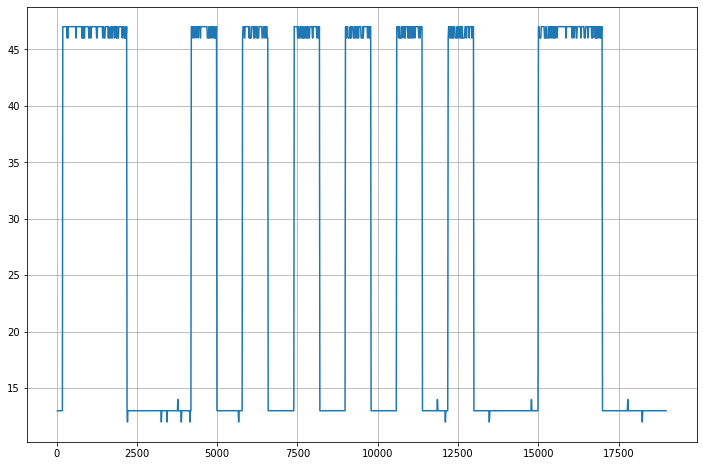

In [5]:
fig = plt.figure(figsize=(12,8))
plt.plot(df.t, df.y)
plt.grid()
plt.show()

### Inspecting the 2 seconds configuration state

In [6]:
# inspecting the configuration state

start = 0 # ms
end   = start+2000 # ms

In [7]:
df[(df.t>start) & (df.t<end)].head()

,t,y
0,26,13.0
1,37,13.0
2,50,13.0
3,61,13.0
4,72,13.0


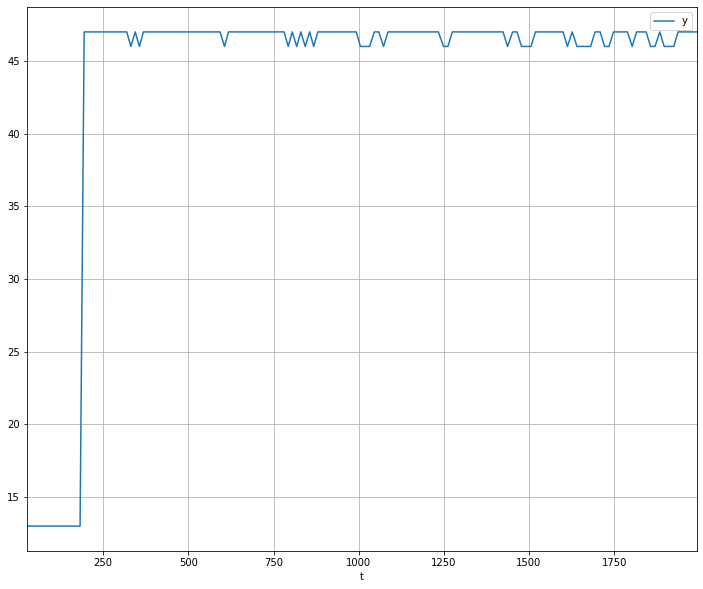

In [8]:
# try to see when we have the state change 0->1
df[(df.t>start) & (df.t<end)].plot('t','y', figsize=(12, 10))
plt.grid()
plt.show()

let's try to get closer... 

In [9]:
# let's see when we have the change 0->1

start = 180        # ms
end   = start+2000 # ms

df[(df.t>start) & (df.t<end)].head(10)

,t,y
13,182,13.0
14,194,47.0
15,206,47.0
16,219,47.0
17,231,47.0
18,244,47.0
19,257,47.0
20,269,47.0
21,281,47.0
22,293,47.0


In [10]:
# ok, around t=194 ms

In [11]:
# let's see now if it lasts exactly 2000 ms
t_0 = 194 
delta = 2000       # one open led for 2 seconds

In [12]:
# check if we see the change 1->0 in the tail
df[(df.t>=t_0) & (df.t<=t_0+delta)].tail()

,t,y
162,2127,46.0
163,2141,47.0
164,2154,46.0
165,2167,46.0
166,2182,47.0


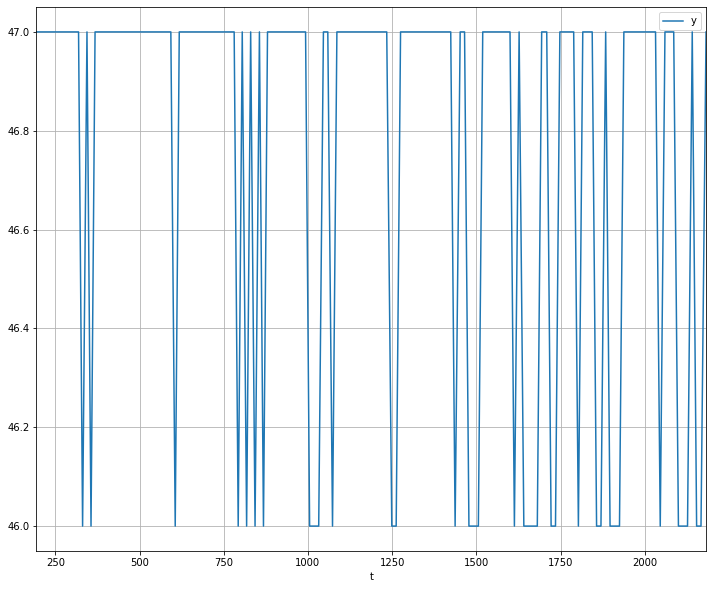

In [13]:
df[(df.t>=t_0) & (df.t<=t_0+delta)].plot('t','y', figsize=(12, 10))
plt.grid()
plt.show()

In [14]:
# we don't se the state change 1->0 after 2000 ms
# so let's try to get a different delta (i.e. 2020ms)
delta=2020

In [15]:
# let's see the tail
df[(df.t>=t_0) & (df.t<=t_0+delta)]

,t,y
14,194,47.0
15,206,47.0
16,219,47.0
17,231,47.0
18,244,47.0
19,257,47.0
20,269,47.0
21,281,47.0
22,293,47.0
23,306,47.0


##### Ok, the change is around 2195 ms

In [16]:
2195 - 194

2001

##### OK! we're almost there in terms of milliseconds, in the sense that the configuration state lasts 2001 ~ 2000 ms

In [17]:
delta = 2001

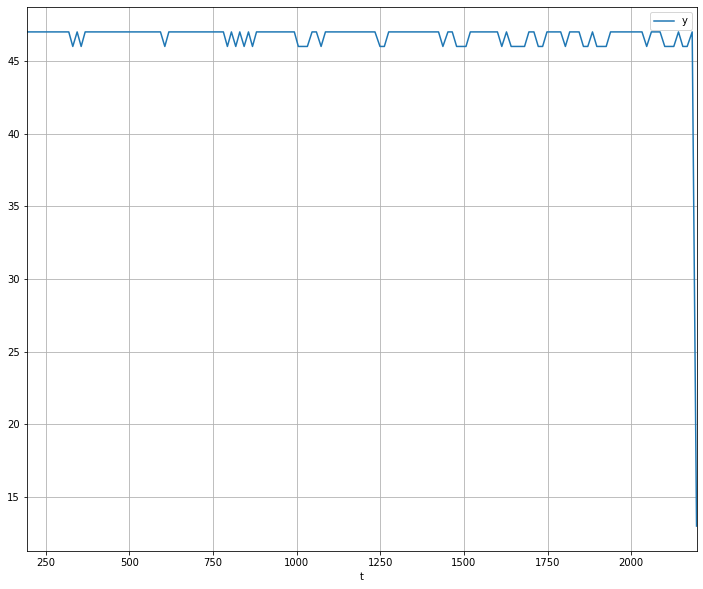

In [18]:
df[(df.t>=t_0) & (df.t<=t_0+delta)].plot('t','y', figsize=(12, 10))
plt.grid()
plt.show()

In [19]:
df

,t,y
0,26,13.0
1,37,13.0
2,50,13.0
3,61,13.0
4,72,13.0
5,83,13.0
6,95,13.0
7,106,13.0
8,119,13.0
9,132,13.0


### Real Time Analysis

In [86]:
rest_state = True
configuration_state = False
loiter_state = False
receiving_state = False
conclusion_state = False
up_state = False
down_state = False

In [87]:
zero_setting_time = 50
zero_list = df[df["t"] <= zero_setting_time]
nominal_zero = np.mean(zero_list)["y"]
zero_thr = 2*nominal_zero

In [88]:
df_real_time = df[df["t"] > zero_setting_time]
df_real_time.reset_index(inplace = True)
ratio = 0.5
cumulative_mean = nominal_zero
loiter_t = 2000
signal_delta = 200

message = ""


for i in range(0, len(df_real_time)):
    
    y = df_real_time["y"][i]
    t = df_real_time["t"][i]
    
    if rest_state:
        print("rest state", y, t)
        # rest_state -> configuration_state transition
        if y > zero_thr:
            configuration_state = True
            rest_state = False
            pass

    if configuration_state:
        print("configuration state", y, t, thr, cumulative_mean)
        cumulative_mean = (y + cumulative_mean)/2
        thr = cumulative_mean*ratio
        if y < thr:
            loiter_state = True
            configuration_state = False
            loiter_start = t
        
    if loiter_state:
        print("loiter state", y, t)
        if t >= loiter_start + loiter_t:
            loiter_state = False
            receiving_state = True
        pass
    
    if receiving_state:
        print("receiving state", y, t)
        if y >= thr:
            up_state = True
            down_state = False
            up_t = t
        if y < thr:
            up_state = False
            down_state = True
            down_t = t
        if up_state:
            if t >= up_t + signal_delta:
                
        pass
    
    if conclusion_state:
        print("conclusion state", y, t)
        pass

rest state 13.0 61
rest state 13.0 72
rest state 13.0 83
rest state 13.0 95
rest state 13.0 106
rest state 13.0 119
rest state 13.0 132
rest state 13.0 144
rest state 13.0 156
rest state 13.0 168
rest state 13.0 182
rest state 47.0 194
configuration state 47.0 194 14.892455614614022 13.0
configuration state 47.0 206 15.0 30.0
configuration state 47.0 219 19.25 38.5
configuration state 47.0 231 21.375 42.75
configuration state 47.0 244 22.4375 44.875
configuration state 47.0 257 22.96875 45.9375
configuration state 47.0 269 23.234375 46.46875
configuration state 47.0 281 23.3671875 46.734375
configuration state 47.0 293 23.43359375 46.8671875
configuration state 47.0 306 23.466796875 46.93359375
configuration state 47.0 319 23.4833984375 46.966796875
configuration state 46.0 331 23.49169921875 46.9833984375
configuration state 47.0 344 23.245849609375 46.49169921875
configuration state 46.0 356 23.3729248046875 46.745849609375
configuration state 47.0 368 23.18646240234375 46.3729248046

loiter state 13.0 4033
loiter state 13.0 4047
loiter state 13.0 4061
loiter state 13.0 4074
loiter state 13.0 4087
loiter state 13.0 4102
loiter state 13.0 4115
loiter state 13.0 4128
loiter state 13.0 4142
loiter state 12.0 4155
loiter state 13.0 4169
loiter state 13.0 4183
loiter state 47.0 4196
receiving state 47.0 4196
receiving state 47.0 4209
receiving state 47.0 4222
receiving state 46.0 4237
receiving state 47.0 4250
receiving state 47.0 4263
receiving state 46.0 4277
receiving state 47.0 4290
receiving state 47.0 4304
receiving state 47.0 4318
receiving state 47.0 4331
receiving state 46.0 4344
receiving state 47.0 4358
receiving state 47.0 4372
receiving state 47.0 4385
receiving state 47.0 4399
receiving state 46.0 4412
receiving state 47.0 4425
receiving state 47.0 4440
receiving state 47.0 4453
receiving state 47.0 4466
receiving state 46.0 4480
receiving state 47.0 4493
receiving state 47.0 4507
receiving state 47.0 4520
receiving state 47.0 4534
receiving state 47.0 4547

receiving state 13.0 10257
receiving state 13.0 10271
receiving state 13.0 10286
receiving state 13.0 10301
receiving state 13.0 10315
receiving state 13.0 10330
receiving state 13.0 10344
receiving state 13.0 10359
receiving state 13.0 10374
receiving state 13.0 10388
receiving state 13.0 10402
receiving state 13.0 10417
receiving state 13.0 10432
receiving state 13.0 10446
receiving state 13.0 10461
receiving state 13.0 10475
receiving state 13.0 10489
receiving state 13.0 10505
receiving state 13.0 10519
receiving state 13.0 10533
receiving state 13.0 10548
receiving state 13.0 10563
receiving state 13.0 10577
receiving state 47.0 10592
receiving state 47.0 10606
receiving state 47.0 10620
receiving state 47.0 10636
receiving state 46.0 10650
receiving state 47.0 10664
receiving state 46.0 10679
receiving state 46.0 10694
receiving state 46.0 10708
receiving state 46.0 10723
receiving state 47.0 10737
receiving state 46.0 10752
receiving state 47.0 10767
receiving state 47.0 10781
r

receiving state 47.0 15790
receiving state 47.0 15804
receiving state 47.0 15819
receiving state 47.0 15834
receiving state 47.0 15848
receiving state 46.0 15862
receiving state 47.0 15877
receiving state 47.0 15892
receiving state 47.0 15906
receiving state 47.0 15921
receiving state 47.0 15935
receiving state 47.0 15950
receiving state 47.0 15965
receiving state 47.0 15979
receiving state 47.0 15993
receiving state 47.0 16008
receiving state 47.0 16023
receiving state 47.0 16037
receiving state 46.0 16052
receiving state 47.0 16066
receiving state 47.0 16080
receiving state 47.0 16096
receiving state 46.0 16110
receiving state 47.0 16124
receiving state 47.0 16139
receiving state 47.0 16154
receiving state 47.0 16168
receiving state 46.0 16183
receiving state 46.0 16197
receiving state 47.0 16211
receiving state 47.0 16227
receiving state 47.0 16241
receiving state 47.0 16256
receiving state 47.0 16270
receiving state 47.0 16285
receiving state 47.0 16300
receiving state 47.0 16314
r